<a href="https://colab.research.google.com/github/Ahmar909/Sneakerclassifier/blob/main/Shoeclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import*
from fastai.vision.widgets import*

In [ ]:
!pip install -q jmd_imagescraper

from pathlib import Path
root = Path().cwd()/"images"

from jmd_imagescraper.core import *
duckduckgo_search(root, "nike", "nike shoes", max_results=100)
duckduckgo_search(root, "adidas", "adidas shoes", max_results=100)
duckduckgo_search(root, "puma", "puma shoes", max_results=100)


Duckduckgo search: nike shoes


Duckduckgo search: adidas shoes


Duckduckgo search: puma shoes


[Path('/content/images/puma/001_093c0a3d.jpg'),
 Path('/content/images/puma/002_9ff1e35a.jpg'),
 Path('/content/images/puma/003_6cb0daa2.jpg'),
 Path('/content/images/puma/004_9abee6dd.jpg'),
 Path('/content/images/puma/005_8cc92683.jpg'),
 Path('/content/images/puma/006_60b59474.jpg'),
 Path('/content/images/puma/007_bcf4d88d.jpg'),
 Path('/content/images/puma/008_a471ee02.jpg'),
 Path('/content/images/puma/009_aa196682.jpg'),
 Path('/content/images/puma/010_de35ee5b.jpg'),
 Path('/content/images/puma/011_25f6ba26.jpg'),
 Path('/content/images/puma/012_1b2bb030.jpg'),
 Path('/content/images/puma/013_ea2dccaf.jpg'),
 Path('/content/images/puma/014_7a6f7dce.jpg'),
 Path('/content/images/puma/015_26011728.jpg'),
 Path('/content/images/puma/016_a009f25a.jpg'),
 Path('/content/images/puma/017_3cb62d98.jpg'),
 Path('/content/images/puma/018_f5c422f4.jpg'),
 Path('/content/images/puma/019_4c67be7d.jpg'),
 Path('/content/images/puma/020_0dec5568.jpg'),
 Path('/content/images/puma/021_8e80231d

In [ ]:
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(root)



HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
dls = ImageDataLoaders.from_folder(root, valid_pct=0.2, item_tfms = Resize(128))


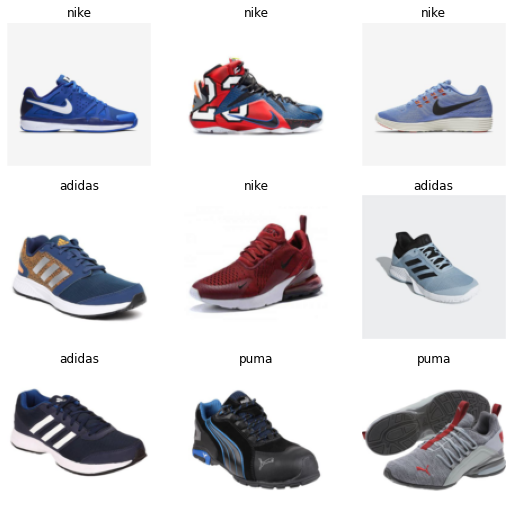

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.755983,1.600586,0.583333,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.349929,1.418893,0.566667,00:01
1,1.114031,1.206457,0.516667,00:01
2,0.888949,1.137643,0.583333,00:01
3,0.716478,1.333565,0.616667,00:01


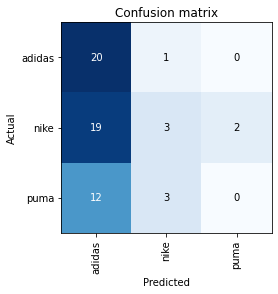

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

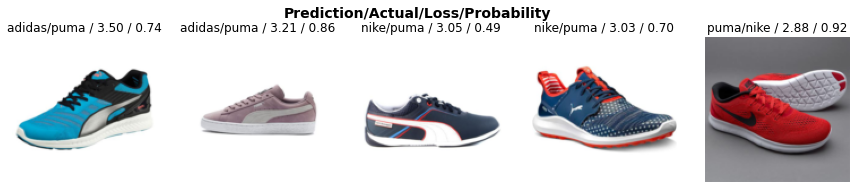

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
learn.export()

In [ ]:
path = Path('/content/images')
path.ls(file_exts ='.pkl')

(#1) [Path('/content/images/export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['adidas', 'nike', 'puma']

In [ ]:
def on_classify_click(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl = widgets.Output()
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_classify_click)

In [ ]:
btn_upload = widgets.FileUpload()


In [ ]:
btn_run = widgets.Button(description = 'Classify')

In [ ]:
VBox([widgets.Label('Select your shoe'), btn_upload, btn_run])
#lbl_pred and out_pl did not work